### Regularization

regularization : 정칙화 
- L1, L2 regularization, Dropout, Batch normalization
- overfitting 을 해결하기 위한 방법 중의 하나


normalization : 정규화 
- 데이터의 형태를 좀더 의미있게, 트레이닝에 적합하게 전처리 하는 과정 
- zero-score, minmax scaler

*example [ normalization ]* 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


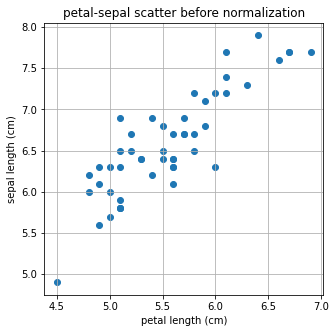

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

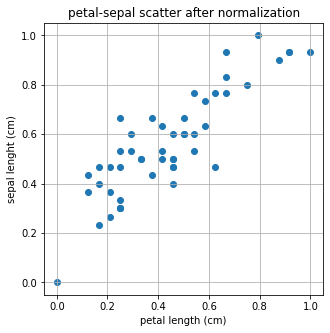

In [ ]:
from sklearn.preprocessing import minmax_scale

# normalization
X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal lenght (cm)')
plt.grid()
plt.show()

*example [ regularization ]*

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

linear = LinearRegression()
linear.fit(X.reshape(-1,1),Y)

a,b = linear.coef_,linear.intercept_
print('기울기 : %0.2f, 절편 : %0.2f'%(a,b))

기울기 : 1.00, 절편 : 1.06


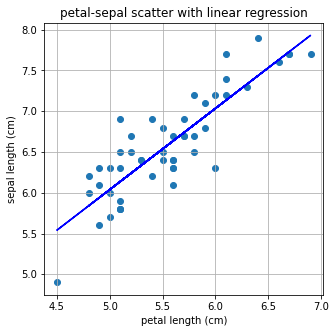

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


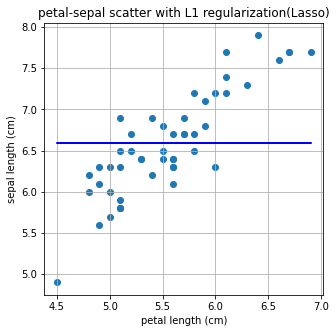

In [ ]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


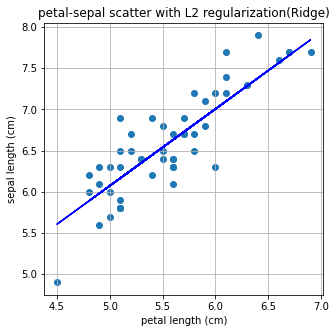

In [ ]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

#### L1 Regularization (Lasso)



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


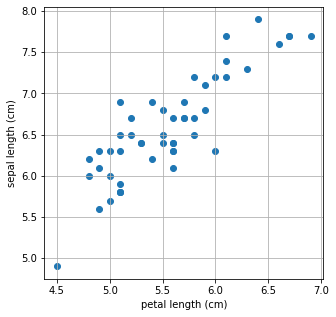

In [ ]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 07


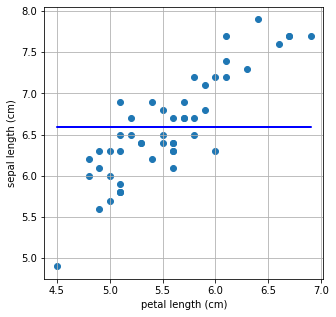

In [ ]:
from sklearn.linear_model import Lasso
L1 = Lasso()
L1.fit(X.reshape(-1,1),Y)
a,b = L1.coef_, L1.intercept_
print('기울기 : %0.2f, 절편 : %02.f'%(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X, L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

p = 1 인 경우 b_0 에 대해 미분 하는 과정에서 lambda 가 사라지므로 regularization 효과를 볼 수 없다. 
= X가 1차원인 선형회귀분석 같은 경우 L1 regularization 은 의미가 없음

2 차원 이상인 데이터로 L1 사용해보기

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [ ]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3,random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

model.predict(X_test)
pred = model.predict(X_test)

print('result of linear regression')
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Mean Root Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

print('\n\n coefficient linear regression')
print(model.coef_)

result of linear regression
Mean Absolute Error :  0.25128973939722626
Mean Squared Error : 0.1062458740952556
Mean Root Squared Error : 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

L1 = Lasso(alpha=0.05)
L1.fit(X_train,y_train)

pred = L1.predict(X_test)

print('result of Lasso')
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Mean Root Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

print('\n\n coefficient of Lasso')
print(L1.coef_)

result of Lasso
Mean Absolute Error :  0.24233731936122138
Mean Squared Error : 0.0955956894578189
Mean Root Squared Error : 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


Linear regression 에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization 에서는 총 13 개중 7개를 제외한 나머지 값들이 모두 0 임을 확인 할 수 있다. = 차원 축소와 비슷한 개념으로 어떤 칼럼이 결과에 영향을 더 크게 미치는 지를 확실히 확인 할 수 있다.

#### L2 regularization

L2 regularization 은 b^2 을 사용해 원의 형태로 나타난다. 
0이 되지는 않지만 0 에 수렴한다.
제곱이 들어가 있기 때문에 절댓값으로 L1 norm 을 쓰는 Lasso 보다 수렴이 빠르다

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data,columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target,columns=['Y'])
x_train,x_test,y_train,y_test = train_test_split(wine_df,target_df,test_size=0.3,random_state=101)

print('🌸')

🌸


In [ ]:
#Lasso first
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05,max_iter=5)
L1.fit(x_train,y_train)
pred = L1.predict(x_test)

print('result of Lasso')
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Root Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

print('\n\n coefficient of Lasso')
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Now L2 regularization
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(x_train,y_train)
pred = L2.predict(x_test)

print('result of Ridge')
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Root Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

print('\n\n coefficient of Ridge')
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.2511466959936429
Mean Squared Error: 0.10568076460795563
Mean Root Squared Error 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


SUMMARY : <br>
- L1 regularization 은 가중치가적은 벡터에 해당하는 계수를 0 으로 보내면서 **차원축소** 와 비슷한 역할을 한다.
- L2 regularization 은 0 이 아닌 0 에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 보다는 수렴 속도가 빠르다
- 결론 : 데이터에 따라 적절한 regularization 방법을 활용해야 한다

EXTRA : LP norm

- vector norm 
  - L1, L2 에서 사용되는 norm
  - p 가 infinity 인 경우에 는 가장 큰 숫자를 출력한다


In [ ]:
x = np.array([1,10,1,1,1])
p = 5
norm_x = np.linalg.norm(x,ord=p)
making_norm = (sum(x**p))**(1/p)
print('result of numpy package norm function : %0.5f'%norm_x)
print('result of making norm : %0.5f'%making_norm)

result of numpy package norm function : 10.00008
result of making norm : 10.00008


In [ ]:
norm_x = np.linalg.norm(x,ord=np.inf)
print('result of infinite norm : %0.5f'%norm_x)

result of infinite norm : 10.00000


- matrix norm 
   - p = 1 : 컬럼의 합이 가장 큰 값이 출력
   - p = infinity : 로우의 합이 가장 큰 값이 출력

In [ ]:
A = np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A = np.linalg.norm(A,ord=np.inf)
print('result inf norm of A :', inf_norm_A)
one_norm_A = np.linalg.norm(A,ord=1)
print('result one norm of A :', one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


#### Drop out


- dropout 이전의 neural network 들은 fully connected architecture 로 모든 뉴런들이 연결되어 있었다.
- dropout : 확률적으로 랜덤하게 몇가지의 뉴런만 선택하여 정보를 전달한다.
- overfitting 을 막는 regularization layer 중 하나. 확률을 너무 높으면 제대로 전달되지 않아 학습이 잘 되지 않고 , 확률을 너무 낮추면 fully connected layer와 차이가 없다.
- overfitting 이 발생하는 경우에 주로 사용한다

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('🌸')

🌸


*Exampl 1 [ not over fitted ]* 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.9),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hitory = model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4206 - accuracy: 0.4459
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1735 - accuracy: 0.5337
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1209 - accuracy: 0.5533
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0941 - accuracy: 0.5609
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0720 - accuracy: 0.5702


In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          # without dropout
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hitory = model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8925


> dropout 없이도 학습이 잘 되는 모델에 dropout 을 추가 했을 때 오히려 학습이 잘 안됨을 확인 할 수 있다.

*Example 2 [ overfitted ]*

In [ ]:
x_train,x_valid,y_train,y_valid = train_test_split(train_images,train_labels,test_size=0.01,random_state=101)

x_train = x_train/255.0
x_valid = x_valid/255.0

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=200,batch_size=512,validation_data=(x_valid,y_valid))

Epoch 1/200
117/117 [==============================] - 2s 13ms/step - loss: 2.0650 - accuracy: 0.5408 - val_loss: 1.6691 - val_accuracy: 0.6250
Epoch 2/200
117/117 [==============================] - 1s 12ms/step - loss: 1.4203 - accuracy: 0.6253 - val_loss: 1.1926 - val_accuracy: 0.6517
Epoch 3/200
117/117 [==============================] - 1s 13ms/step - loss: 1.0898 - accuracy: 0.6765 - val_loss: 0.9676 - val_accuracy: 0.7217
Epoch 4/200
117/117 [==============================] - 1s 12ms/step - loss: 0.9089 - accuracy: 0.7170 - val_loss: 0.8327 - val_accuracy: 0.7367
Epoch 5/200
117/117 [==============================] - 1s 12ms/step - loss: 0.8006 - accuracy: 0.7331 - val_loss: 0.7493 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 1s 12ms/step - loss: 0.7363 - accuracy: 0.7452 - val_loss: 0.6964 - val_accuracy: 0.7817
Epoch 7/200
117/117 [==============================] - 1s 12ms/step - loss: 0.6923 - accuracy: 0.7543 - val_loss: 0.6620 - val_accuracy:

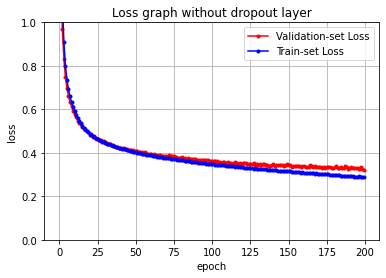

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Validation-set Loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train-set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

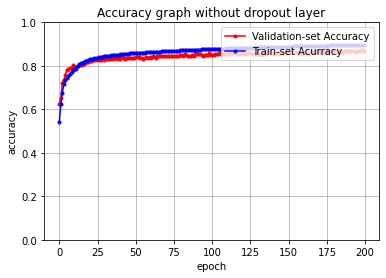

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len,y_vacc,marker='.',c='red',label='Validation-set Accuracy')
plt.plot(x_len,y_acc,marker='.',c='blue',label='Train-set Acurracy')
plt.legend(loc='upper right')
plt.grid()
plt.title('Accuracy graph without dropout layer')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=200,batch_size=512,validation_data=(x_valid,y_valid))
# 우리 컴퓨터 괴롭히지마 !!ㅜㅜ

Epoch 1/200
117/117 [==============================] - 2s 16ms/step - loss: 2.0580 - accuracy: 0.4798 - val_loss: 1.6504 - val_accuracy: 0.5517
Epoch 2/200
117/117 [==============================] - 2s 14ms/step - loss: 1.4247 - accuracy: 0.5682 - val_loss: 1.1850 - val_accuracy: 0.6667
Epoch 3/200
117/117 [==============================] - 2s 14ms/step - loss: 1.1252 - accuracy: 0.6325 - val_loss: 0.9822 - val_accuracy: 0.7100
Epoch 4/200
117/117 [==============================] - 2s 14ms/step - loss: 0.9656 - accuracy: 0.6758 - val_loss: 0.8532 - val_accuracy: 0.7450
Epoch 5/200
117/117 [==============================] - 2s 14ms/step - loss: 0.8643 - accuracy: 0.7036 - val_loss: 0.7704 - val_accuracy: 0.7567
Epoch 6/200
117/117 [==============================] - 2s 14ms/step - loss: 0.7996 - accuracy: 0.7209 - val_loss: 0.7221 - val_accuracy: 0.7633
Epoch 7/200
117/117 [==============================] - 2s 14ms/step - loss: 0.7530 - accuracy: 0.7315 - val_loss: 0.6816 - val_accuracy:

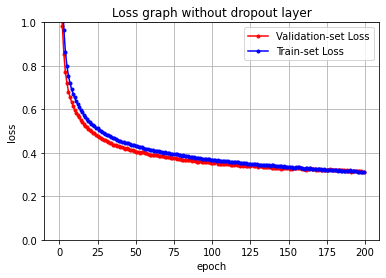

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Validation-set Loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train-set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

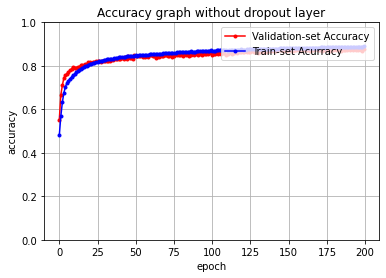

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len,y_vacc,marker='.',c='red',label='Validation-set Accuracy')
plt.plot(x_len,y_acc,marker='.',c='blue',label='Train-set Acurracy')
plt.legend(loc='upper right')
plt.grid()
plt.title('Accuracy graph without dropout layer')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Batch Normalization
- gradient vanishing, explode  문제를 해결하는 방법 
- noramlize 부분에 분모에 e(입실론)이 추가됨
 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('🌸')

🌸


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(train_images,train_labels, test_size=0.3,random_state=101)

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=20,batch_size = 2048,validation_data=(x_valid,y_valid))

Epoch 1/20
21/21 [==============================] - 1s 36ms/step - loss: 1.1882 - accuracy: 0.6300 - val_loss: 0.7319 - val_accuracy: 0.7507
Epoch 2/20
21/21 [==============================] - 1s 29ms/step - loss: 0.6477 - accuracy: 0.7822 - val_loss: 0.5901 - val_accuracy: 0.8038
Epoch 3/20
21/21 [==============================] - 1s 29ms/step - loss: 0.5539 - accuracy: 0.8164 - val_loss: 0.5338 - val_accuracy: 0.8221
Epoch 4/20
21/21 [==============================] - 1s 28ms/step - loss: 0.5095 - accuracy: 0.8286 - val_loss: 0.4983 - val_accuracy: 0.8342
Epoch 5/20
21/21 [==============================] - 1s 27ms/step - loss: 0.4764 - accuracy: 0.8415 - val_loss: 0.4746 - val_accuracy: 0.8399
Epoch 6/20
21/21 [==============================] - 1s 28ms/step - loss: 0.4542 - accuracy: 0.8484 - val_loss: 0.4578 - val_accuracy: 0.8447
Epoch 7/20
21/21 [==============================] - 1s 28ms/step - loss: 0.4393 - accuracy: 0.8518 - val_loss: 0.4417 - val_accuracy: 0.8497
Epoch 8/20
21

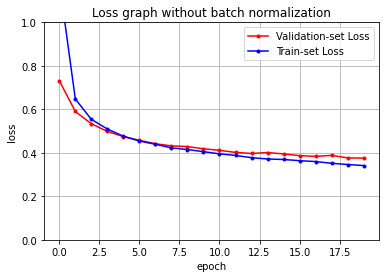

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Validation-set Loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train-set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without batch normalization')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

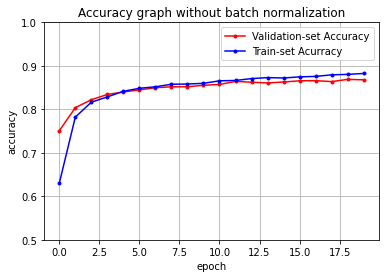

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len,y_vacc,marker='.',c='red',label='Validation-set Accuracy')
plt.plot(x_len,y_acc,marker='.',c='blue',label='Train-set Acurracy')
plt.legend(loc='upper right')
plt.grid()
plt.title('Accuracy graph without batch normalization')
plt.ylim(0.5,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(train_images,train_labels, test_size=0.3,random_state=101)

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=20,batch_size = 2048,validation_data=(x_valid,y_valid))

Epoch 1/20
21/21 [==============================] - 1s 41ms/step - loss: 0.9070 - accuracy: 0.6920 - val_loss: 1.0181 - val_accuracy: 0.6882
Epoch 2/20
21/21 [==============================] - 1s 32ms/step - loss: 0.5111 - accuracy: 0.8256 - val_loss: 0.8303 - val_accuracy: 0.7644
Epoch 3/20
21/21 [==============================] - 1s 32ms/step - loss: 0.4478 - accuracy: 0.8468 - val_loss: 0.7502 - val_accuracy: 0.7861
Epoch 4/20
21/21 [==============================] - 1s 32ms/step - loss: 0.4103 - accuracy: 0.8593 - val_loss: 0.6747 - val_accuracy: 0.8154
Epoch 5/20
21/21 [==============================] - 1s 32ms/step - loss: 0.3822 - accuracy: 0.8674 - val_loss: 0.6280 - val_accuracy: 0.8246
Epoch 6/20
21/21 [==============================] - 1s 32ms/step - loss: 0.3608 - accuracy: 0.8735 - val_loss: 0.5746 - val_accuracy: 0.8348
Epoch 7/20
21/21 [==============================] - 1s 33ms/step - loss: 0.3445 - accuracy: 0.8797 - val_loss: 0.5489 - val_accuracy: 0.8428
Epoch 8/20
21

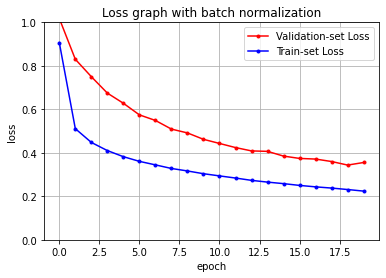

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Validation-set Loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train-set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph with batch normalization')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

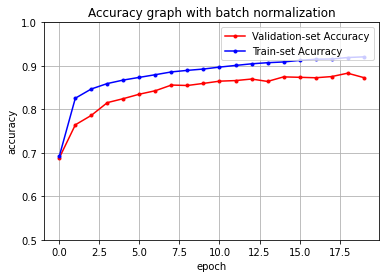

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len,y_vacc,marker='.',c='red',label='Validation-set Accuracy')
plt.plot(x_len,y_acc,marker='.',c='blue',label='Train-set Acurracy')
plt.legend(loc='upper right')
plt.grid()
plt.title('Accuracy graph with batch normalization')
plt.ylim(0.5,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()